<a href="https://colab.research.google.com/github/vaghasiatirth24/Machine-Learning/blob/main/ML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [ ]:
test_data["Sex"]=pd.get_dummies(test_data["Sex"])
train_dataset["Sex"]=pd.get_dummies(train_dataset["Sex"])

In [ ]:
train_dataset['Age'].fillna(train_dataset['Age'].median(), inplace = True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

train_dataset['Fare'].fillna(train_dataset['Fare'].median(), inplace = True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace = True)

In [ ]:
combine=[train_dataset,test_data]
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_dataset['Title'], train_dataset['Sex'])

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
train_dataset['Age_bin'] = pd.cut(train_dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
test_data['Age_bin'] = pd.cut(test_data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [ ]:
train_dataset['Fare_bin'] = pd.cut(train_dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
test_data['Fare_bin'] = pd.cut(test_data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])


In [ ]:
train_dataset = pd.get_dummies(train_dataset, columns = ["Age_bin","Embarked"],prefix=["Age_type","Em_type"])


In [ ]:
test_data = pd.get_dummies(test_data, columns = ["Age_bin","Embarked"],prefix=["Age_type","Em_type"])

In [ ]:
train_dataset = pd.get_dummies(train_dataset, columns = ["Fare_bin"],prefix=["Fare_type"])
test_data = pd.get_dummies(test_data, columns = ["Fare_bin"],prefix=["Fare_type"])

In [ ]:
train_dataset = train_dataset.drop(['Name','PassengerId','Cabin','Ticket'], axis=1)
test_data = test_data.drop(['Name','PassengerId','Cabin','Ticket'], axis=1)

In [ ]:
train_dataset = train_dataset.drop(['Fare','Age'], axis=1)
test_data = test_data.drop(['Fare','Age'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
f = train_dataset.drop("Survived",axis=1)
t = train_dataset["Survived"]
X_train,X_test,y_train,y_test = train_test_split(f,t,test_size=0.3,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 16), (268, 16), (623,), (268,))

TASK-2

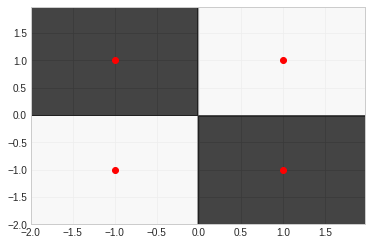

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

X = np.array([
    [-1, -1],
    [-1, 1],
    [1, -1],
    [1, 1]
])

y = np.array([0, 1, 1, 0])

h = .02  

C = 1.0  
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
   
    if clf != poly_svc:
        continue
  

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c='red', cmap=plt.cm.coolwarm)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.show()

TASK-5

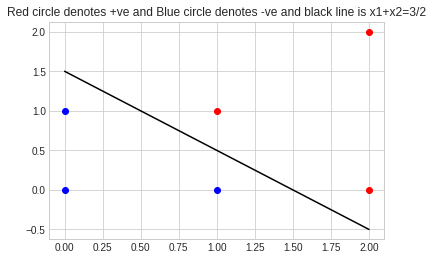

In [34]:
#ANSWER-5 USING GRAPH TO CHECK IF IT IS LINARLY SEPERABLE
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

plt.plot([1,2,2],[1,2,0],'ro')
plt.plot([0,1,0],[0,0,1],'bo')
x = np.linspace(0,2,50)
y = (3/2)-x
plt.title('Red circle denotes +ve and Blue circle denotes -ve and black line is x1+x2=3/2')
plt.plot(x, y, '-r', label='y=(3/2)-x',color='black')

TASK-6

Text(0.5, 1.0, 'Red circle denotes +ve and Blue circle denotes -ve')

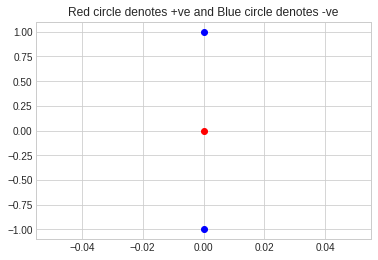

In [8]:
#ANSWER-6 USING GRAPH TO CHECK IF IT IS LINARLY SEPERABLE OR NOT

plt.plot([0],[0],'ro')
plt.plot([0,0],[-1,+1],'bo')
plt.title('Red circle denotes +ve and Blue circle denotes -ve')

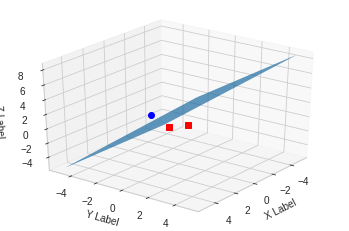

In [38]:
#ANSWER-6 USING 3-D GRAPH TO CHECK IF IT IS LINARLY SEPERABLE OR NOT

from sklearn import svm, datasets

X = np.array([
  [1, 0, 0],
  [1, -1*np.sqrt(2), 1],
  [1, np.sqrt(2), 1]
])

Y = np.array([1, 0, 1])

X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]
model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)


z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 37)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

TASK-7

In [ ]:
#ANSWER-7 SVM ON TITANIC DATASET USING LINEAR KERNEL

from sklearn import svm
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear')   
clf.fit(X_train, y_train.ravel());
accuracy_score = cross_val_score(clf, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy Score for Linear Kernel:", accuracy_score)

Accuracy Score for Linear Kernel: 0.8169935483870967


In [ ]:
#ANSWER-7 SVM ON TITANIC DATASET USING QUADRATIC KERNEL
clf = svm.SVC(kernel='poly', degree=2)
clf.fit(X_train, y_train.ravel());
accuracy_score = cross_val_score(clf, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy Score for Quadratic Kernel:", accuracy_score)

Accuracy Score for Quadratic Kernel: 0.8362709677419355


In [ ]:
#ANSWER-7 SVM ON TITANIC DATASET USING RBF KERNEL
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train.ravel());

accuracy_score = cross_val_score(clf, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy Score for RBF Kernel:", accuracy_score)

Accuracy Score for RBF Kernel: 0.8395096774193549
